# Cluster Analysis

The purpose of cluster analysis is to group observations into groups such that within each group the observations are similar and distinct between groups.
Within each group the variability should be minimal and the variability between groups should be maximum.
Cluster analysis, or clustering, is an unsupervised machine learning task. It involves automatically discovering natural grouping in data.


# Euclidean distance 

The Euclidean distance generates the linear distance between any two points in a field with k dimensions.
It is a generalization of the Pythagorean Theorem.


# Minkowski distance

Can create weights for each variable when necessary.
It is a measure less affected by the presence of outliers (compared to
Euclidean distance).


# Hierarchical Cluster

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.


<img src="https://miro.medium.com/max/740/1*VvOVxdBb74IOxxF2RmthCQ.png" alt="Hierarchical Cluster" width="340"/>



**Techniques**

• Single Linkage - Nearest Neighbor

• Complete Linkage - Farthest Neighbor

• Avarage Linkage - Average

• Centroid Method - Centroid

• Ward's Method



# Case Study

Using a database with the nutritional table of 25 McDonalds hamburgers to find clusters.

In [1]:
#importing libraries to be used

suppressPackageStartupMessages(library(dendextend))
install.packages("factoextra")
library(tidyverse) #data manipulation package
library(cluster) #cluster algorithm
library(dendextend) #compare dendrograms
library(fpc) #cluster and visualization algorithm
library(gridExtra)
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘nloptr’, ‘pbkrtest’, ‘lme4’, ‘car’, ‘flashClust’, ‘rstatix’, ‘FactoMineR’, ‘ggpubr’


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
#database reading
mcdonalds <- read.table("../input/mcdonalds/MCDONALDS.csv", sep = ";", dec = ",", header = T)

#database visualization
head(mcdonalds)

,Lanche,Valor.Energetico,Carboidratos,Proteinas,Gorduras.Totais,Gorduras.Saturadas,Gorduras.Trans,Colesterol,Fibra.Alimentar,Sodio,Calcio,Ferro
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
1,Big Mac,504,41,25,27,12.0,0.5,54,3.5,960,162,6.5
2,Big Tasty,843,45,41,55,24.0,1.7,104,5.1,1511,381,8.2
3,Quarterao,558,36,31,32,16.0,1.3,86,3.6,1216,275,10.0
4,Mcnifico Bacon,625,38,34,37,16.0,1.3,95,3.9,1255,209,11.0
5,Cheddar McMelt,507,33,29,29,14.0,1.2,81,2.9,819,199,10.0
6,McFish,373,38,18,16,5.8,0.4,43,2.2,773,168,3.8


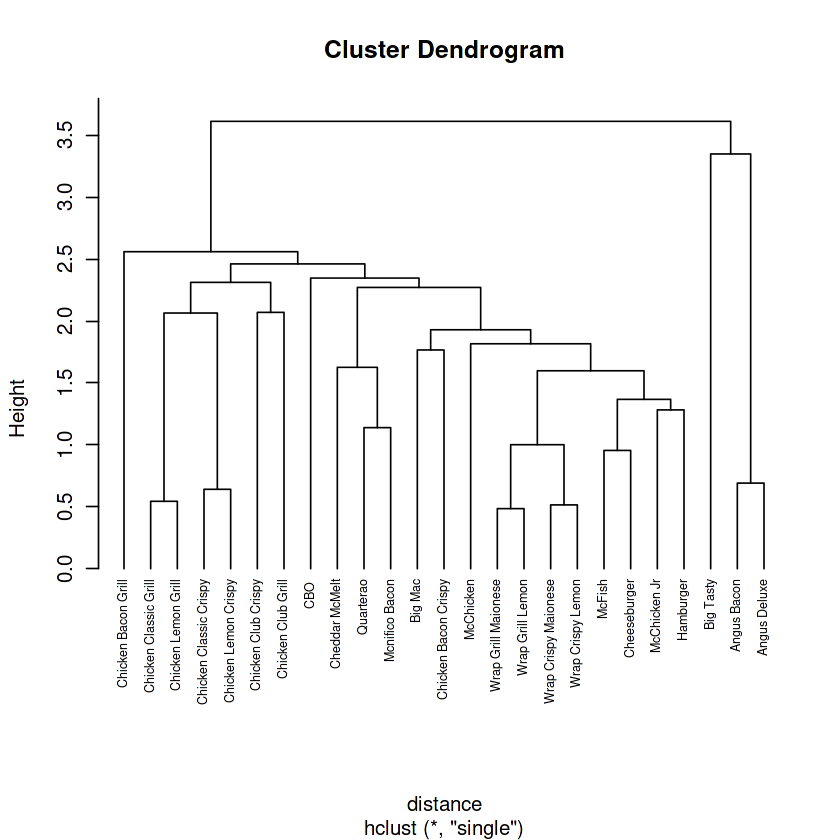

In [3]:
#turning hamburgers into index
rownames(mcdonalds) <- mcdonalds[,1]
mcdonalds <- mcdonalds[,-1]

#standardizing the scales
#when we have variables with different scales, we need to be concerned with data standardization
mcdonalds.standard <- scale(mcdonalds)

#calculate the matrix distances using the Euclidean distance
distance <- dist(mcdonalds.standard, method = "euclidean")

#calculate the cluster: available methods "average", "single", "complete" and "ward.D"
cluster.hierarchical <- hclust(distance, method = "single" )

#dendogram
plot(cluster.hierarchical, cex = 0.6, hang = -1)

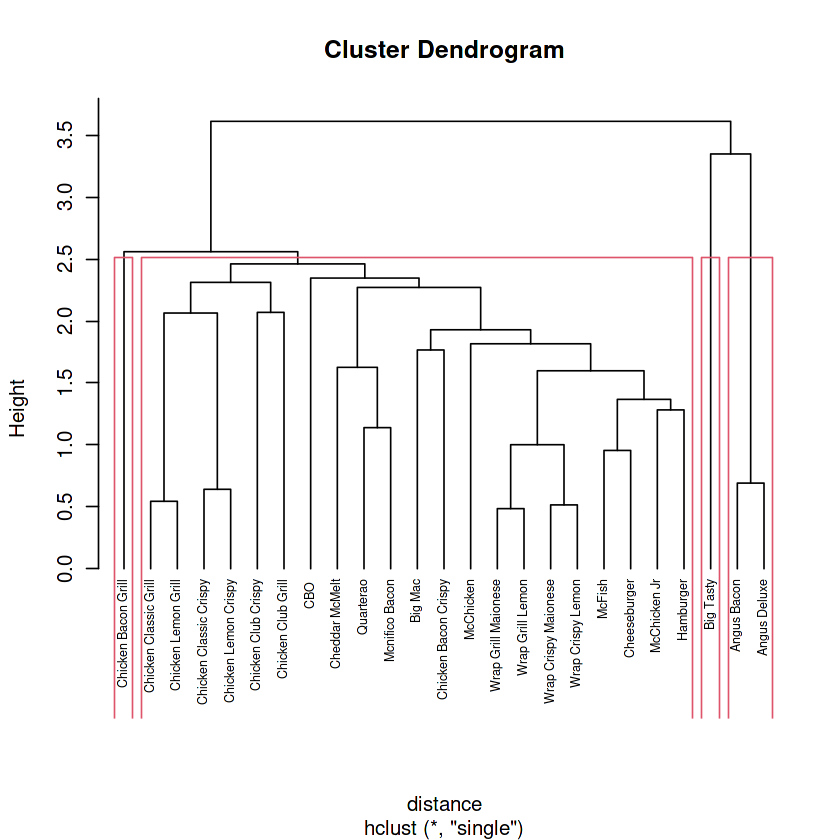

In [4]:
#dendogram
plot(cluster.hierarchical, cex = 0.6, hang = -1)

#highlight the groups in the dendrogram
rect.hclust(cluster.hierarchical, k = 4)

# Elbow Method

One of the ways to infer how many groups to create is the **Elbow method**.
The idea of the Elbow Method is to minimize the variability within the cluster.

The location of a bend (knee) in the weft is usually considered as an indicator of the appropriate number of clusters.

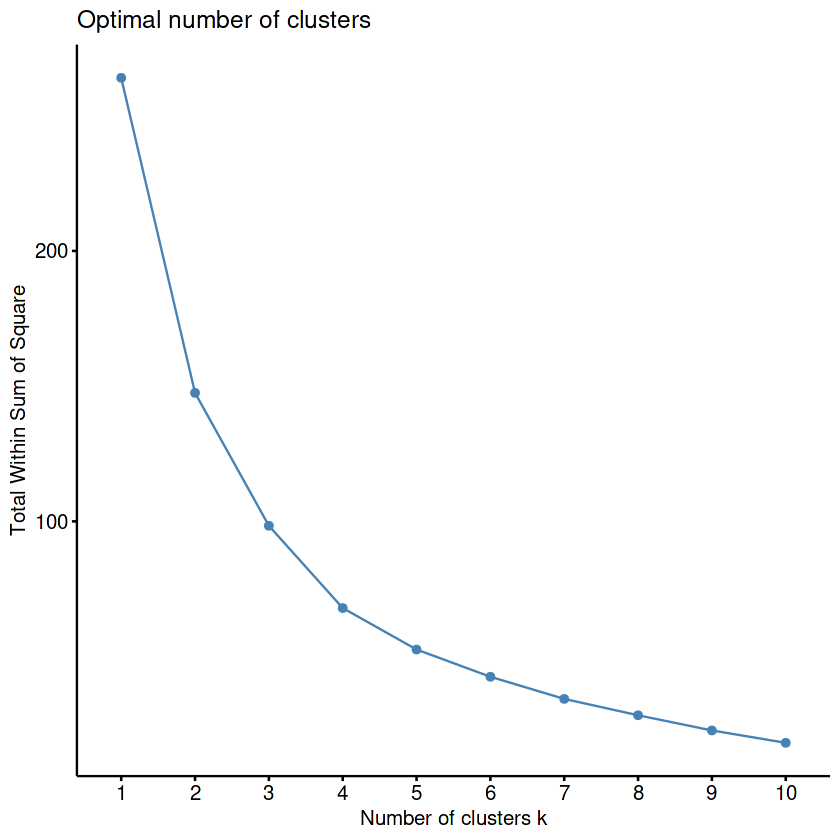

In [5]:
#checking elbow
fviz_nbclust(mcdonalds.standard, FUN = hcut, method = "wss")

In [6]:
#creating 4 groups of burgers
group4_hamburgers <- cutree(cluster.hierarchical, k = 4)
table(group4_hamburgers)

#transforming cluster output into data frame
group_hamburgers <- data.frame(group4_hamburgers)

#joining with the original base
final_data <- cbind(mcdonalds, group_hamburgers)


group4_hamburgers
 1  2  3  4 
21  1  1  2 

Group 1 received 21 hamburgers

Group 2 received 1 hamburger

Group 3 received 1 hamburger

Group 4 received 2 hamburgers

In [7]:
#descriptive analysis
groupaverage <- final_data %>% 
  group_by(group4_hamburgers) %>% 
  summarise(n = n(),
            Valor.Energetico = mean(Valor.Energetico), 
            Carboidratos = mean(Carboidratos), 
            Proteinas = mean(Proteinas),
            Gorduras.Totais = mean(Gorduras.Totais), 
            Gorduras.Saturadas = mean(Gorduras.Saturadas), 
            Gorduras.Trans = mean(Gorduras.Trans),
            Colesterol = mean(Colesterol), 
            Fibra.Alimentar = mean(Fibra.Alimentar), 
            Sodio = mean(Sodio),
            Calcio = mean(Calcio), 
            Ferro = mean(Ferro) )
groupaverage


group4_hamburgers,n,Valor.Energetico,Carboidratos,Proteinas,Gorduras.Totais,Gorduras.Saturadas,Gorduras.Trans,Colesterol,Fibra.Alimentar,Sodio,Calcio,Ferro
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21,445.3333,40.2381,24.0,20.8619,7.157143,0.447619,50.42857,3.609524,1074.952,135.5714,4.161429
2,1,843.0000,45.0000,41.0,55.0000,24.000000,1.700000,104.00000,5.100000,1511.000,381.0000,8.200000
3,1,425.0000,31.0000,39.0,16.0000,5.000000,0.400000,83.00000,3.000000,1151.000,161.0000,3.900000
4,2,862.0000,56.5000,52.5,47.5000,21.000000,1.700000,142.00000,5.000000,1816.500,195.0000,3.900000


The clusters grouped the hamburgers that were most similar according to the nutritional table.


Cluster 1 received all the hamburgers that were similar to each other.

Cluster 2 received the hamburger with characteristics that were too high to enter group 1, but not so “heavy” to enter cluster 4.

Cluster 3 had the lightest hamburger.

Cluster 4 had the two most caloric.

# Non-hierarchical Cluster

The **k-means** methodology follows 3 steps:
1. Select (or specify) the starting centroids
(seeds).
2. Read the observations and update the centroids, this
process is repeated until convergence.
3. A final reading of the data marks each observation
to the nearest centroid.

<img src="https://miro.medium.com/max/432/0*hmlHRqPwiKrgUbbW" alt="Hierarchical Cluster" width="340"/>



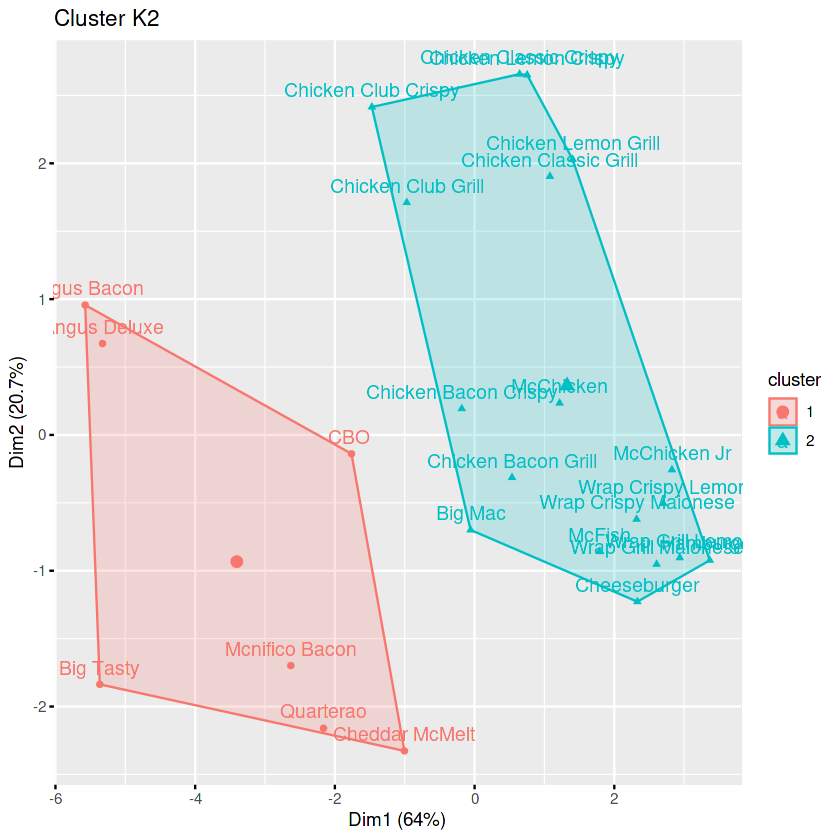

In [8]:
#run k-means model with two centers
mcdonalds.k2 <- kmeans(mcdonalds.standard, centers = 2)

#view the clusters
fviz_cluster(mcdonalds.k2, data = mcdonalds.standard, main = "Cluster K2")



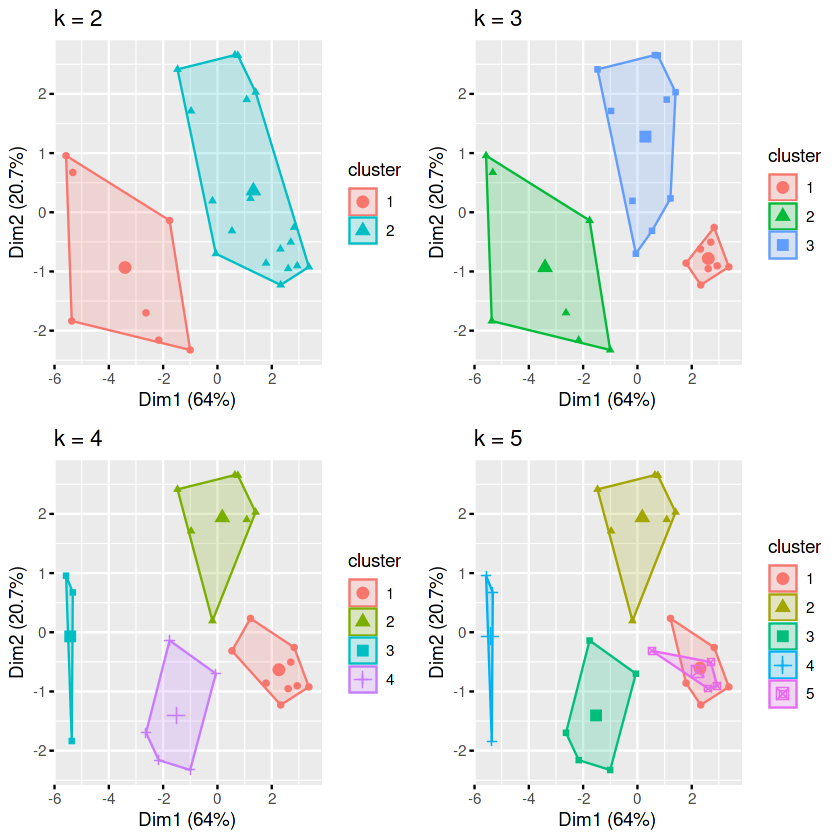

In [9]:
#testing other quantities of centers
mcdonalds.k3 <- kmeans(mcdonalds.standard, centers = 3)
mcdonalds.k4 <- kmeans(mcdonalds.standard, centers = 4)
mcdonalds.k5 <- kmeans(mcdonalds.standard, centers = 5)

#create graphs
G1 <- fviz_cluster(mcdonalds.k2, geom = "point", data = mcdonalds.standard) + ggtitle("k = 2")
G2 <- fviz_cluster(mcdonalds.k3, geom = "point",  data = mcdonalds.standard) + ggtitle("k = 3")
G3 <- fviz_cluster(mcdonalds.k4, geom = "point",  data = mcdonalds.standard) + ggtitle("k = 4")
G4 <- fviz_cluster(mcdonalds.k5, geom = "point",  data = mcdonalds.standard) + ggtitle("k = 5")

#print graphics
grid.arrange(G1, G2, G3, G4, nrow = 2)